### DA 2 & Coding 2 — Homework 2: 

Jiaqi Pan 2500042

Github Repo:  https://github.com/guiqvlaixi2164-max/Final-Term-Project-DA2-Coding-2_JiaqiPan/

----

#### My subject: 

I chose the topic "Environment and Energy", and focused on a crucial environmental issue: Air Pollution, analyzing the relationship between **Y: Air Quality Index Score** and **X: Population Density** in Urban Areas in China.

My control variables: **Z1: Green Coverage Rate** and **Z2: Industrial Land Ratio** in Urban Areas in China.

---

#### Datasets used in this project:

- **AQI-dataset_367_Chinese_cities_2014-2024**: 

The annual average AQI values for 367 cities across China.

The Air Quality Index (AQI) is a comprehensive indicator used to assess air pollution levels, based on the concentrations of six major pollutants: PM2.5, PM10, SO₂, NO₂, O₃, and CO. 

Data Source: https://www.scidb.cn/en/detail?dataSetId=24ca93d08fdf4b9fa12842733caffe6d

- **Urban-area_square-kilometers**: The urban area data of cities across China.

- **Urban-construction-land-area_square-kilometers**: The total area of ​​urban construction land of cities across China, excluding undeveloped land area within the cities.

- **Urban-construction-land-area_Green-space-and-square-area_square-kilometers**: The total area of ​​land used for green spaces and squares within urban construction land. Squares are also included here, as squares typically include large areas of lawns and flowerbeds.

- **Urban-construction-land-area_Industrial-land_square-kilometers**: The total area of ​​industrial land within urban construction land.

- **Urban-population_in-ten-thousand: the population data of cities across China**.

Data Source: China Urban Construction Statistical Yearbook

Using these datasets, we can calculate the values of the following variables:

- **X: Green Coverage Rate** = (Total area of ​​green spaces and squares) / (Total area of ​​urban construction land)

- **Z1: Population density** = (Population) / (Urban area)

- **Z2: Industrial land ratio** = (Industrial land area) / (Total area of ​​urban construction land)

An Additional Dataset:

- **city_translation**: the English translations of all city names. Note that all the original datasets have city names in Chinese, because they are downloaded from the open websites from the Chinese government. Therefore, I used the following python script to create another dataset: city_translation.


---

#### Preparation: getting a translation of city names in the datasets




In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from plotnine import *
import matplotlib.pyplot as plt
from stargazer.stargazer import Stargazer
from skimpy import skim

%matplotlib inline
warnings.filterwarnings("ignore")


In [2]:
# from deep_translator import GoogleTranslator

# urban = pd.read_excel("Urban-area_square-kilometers.xlsx")
# city_cn = urban["地区名称"].dropna().unique()

# city_en = []
# for city in city_cn:
    # try:
        # translated = GoogleTranslator(source='zh-CN', target='en').translate(city)
        # city_en.append(translated)
        # print(translated)
    # except Exception as e:
        # print(f"Error translating {city}: {e}")
        # city_en.append(city)
 
# city_translation = pd.DataFrame({
    # "city_cn": city_cn,
    # "city_en": city_en
# })
# city_translation.to_csv("../data/city_translation.csv", index=False, encoding="utf-8-sig")


----
----

### Part I: Data Cleaning

#### 1. Getting to know the datasets

- 1.1.  Load all datasets into Python. 
- 1.2.  Translate all the column names in Chinese into English. Print the list of column names for each dataset.
- 1.3.  Merge each dataset with city_translation, so that the English names of all cities are shown.
- 1.4.  Print the number of unrepeated observations and first few rows for each dataset. 

In [3]:
# 1.1.
# Load all datasets into Python. 

# AQI: the annual average AQI values for 367 cities across China.
aqi_cn=pd.read_excel("../data/AQI-dataset_367_Chinese_cities_2014-2024.xlsx")

# Urban: the urban area data of cities across China.
urban_cn=pd.read_excel("../data/Urban-area_square-kilometers.xlsx")

# Urban_construct: the total area of ​​urban construction land of cities across China, excluding undeveloped land area within the cities.
urban_construct_cn=pd.read_excel("../data/Urban-construction-land-area_square-kilometers.xlsx")

# Green: the total area of ​​land used for green spaces and squares within urban construction land.
green_cn=pd.read_excel("../data/Urban-construction-land-area_Green-space-and-square-area_square-kilometers.xlsx")

# Industrial: the total area of ​​industrial land within urban construction land.
industrial_cn=pd.read_excel("../data/Urban-construction-land-area_Industrial-land_square-kilometers.xlsx")

# population: the population data of cities across China.
population_cn=pd.read_excel("../data/Urban-population_in-ten-thousand.xlsx")


city_translation=pd.read_csv("../data/city_translation.csv")

In [4]:
# 1.2.

# Translate all the column names in Chinese into English. 
aqi_cn=aqi_cn.rename(columns={"城市":"city_cn"})
urban_cn=urban_cn.rename(columns={"地区名称":"city_cn","市代码":"city_code"})
urban_construct_cn=urban_construct_cn.rename(columns={"地区名称":"city_cn","市代码":"city_code"})
green_cn=green_cn.rename(columns={"地区名称":"city_cn","市代码":"city_code"})
industrial_cn=industrial_cn.rename(columns={"地区名称":"city_cn","市代码":"city_code"})
population_cn=population_cn.rename(columns={"地区名称":"city_cn","市代码":"city_code"})

# Print the list of column names for each dataset. 
print("Columns in AQI:")
print(aqi_cn.columns.tolist())
print("Columns in Urban Area:")
print(urban_cn.columns.tolist())
print("Columns in Urban Construction Area:")
print(urban_construct_cn.columns.tolist())
print("Columns in Green Area:")
print(green_cn.columns.tolist())
print("Columns in Industrial Area:")
print(industrial_cn.columns.tolist())
print("Columns in Population:")
print(population_cn.columns.tolist())
print("Columns in City Translation:")
print(city_translation.columns.tolist())

Columns in AQI:
['city_cn', 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Columns in Urban Area:
['city_cn', 'city_code', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
Columns in Urban Construction Area:
['city_cn', 'city_code', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
Columns in Green Area:
['city_cn', 'city_code', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
Columns in Industrial Area:
['city_cn', 'city_code', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
Columns in Population:
['city_cn', 'city_code', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
Columns in City 

In [5]:
# Print the first 10 rows for the city translation.
city_translation.head(10)

,city_cn,city_en
0,台湾省,Taiwan Province
1,安庆市,Anqing City
2,蚌埠市,Bengbu City
3,亳州市,Bozhou City
4,池州市,Chizhou City
5,滁州市,Chuzhou City
6,阜阳市,Fuyang City
7,合肥市,Hefei City
8,淮北市,Huaibei City
9,淮南市,Huainan City


In [6]:
# 1.3. & 1.4.

# Merge each dataset with city_translation.
# Print the number of unrepeated observations and first few rows for each dataset.

# AQI
aqi=pd.merge(city_translation,aqi_cn,on = ["city_cn"],how = 'inner')
print("In AQI, there are observations of", len(aqi[['city_cn','city_en']].drop_duplicates()),"unrepeated cities.") 
print("First 10 rows:")
aqi.head(10)

In AQI, there are observations of 357 unrepeated cities.
First 10 rows:


,city_cn,city_en,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,安庆市,Anqing City,NaN,75.438356,81.887671,82.446575,80.060274,82.942466,68.564384,66.301370,72.243836,73.939726,71.199115
1,蚌埠市,Bengbu City,NaN,88.528767,89.358904,96.002740,91.210959,87.290411,79.786301,78.920548,79.084932,81.610959,84.880531
2,亳州市,Bozhou City,NaN,86.457534,90.076712,106.613699,98.230137,98.846575,90.317808,83.934247,84.608219,87.745205,89.017699
3,池州市,Chizhou City,0.241096,56.169863,74.542466,87.950685,76.641096,81.372603,65.846575,67.117808,70.586301,70.580822,68.884956
4,滁州市,Chuzhou City,NaN,85.273973,91.131507,91.890411,89.049315,85.871233,76.465753,74.939726,74.956164,77.257534,83.623894
5,阜阳市,Fuyang City,NaN,77.063014,92.531507,100.638356,90.361644,97.950685,87.909589,82.983562,83.356164,86.106849,87.646018
6,合肥市,Hefei City,107.712329,91.408219,89.463014,93.178082,84.002740,85.391781,71.616438,70.512329,72.528767,73.287671,75.676991
7,淮北市,Huaibei City,NaN,94.063014,92.983562,107.627397,99.372603,100.698630,89.473973,83.104110,84.969863,90.232877,94.969027
8,淮南市,Huainan City,NaN,77.413699,83.345205,101.698630,92.219178,95.123288,85.736986,83.432877,79.232877,82.558904,84.026549
9,黄山市,Huangshan City,NaN,51.257534,49.854795,54.213699,43.958904,55.635616,53.342466,48.210959,50.789041,51.219178,51.823009


In [7]:
# urban
urban=pd.merge(city_translation,urban_cn,on = ["city_cn"],how = 'inner')
print("In urban, there are observations of", len(urban[['city_cn','city_en']].drop_duplicates()),"unrepeated cities.") 
print("First 10 rows:")
urban.head(10)

In urban, there are observations of 745 unrepeated cities.
First 10 rows:


,city_cn,city_en,city_code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,台湾省,Taiwan Province,710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,安庆市,Anqing City,340800,821.20,821.20,821.20,821.20,821.20,821.20,821.20,821.20,821.20,821.20,821.20,821.20,821.20,821.20,821.20,821.20,821.20
2,蚌埠市,Bengbu City,340300,601.50,601.50,601.50,601.50,601.50,601.50,601.50,789.93,956.93,956.93,956.93,956.93,956.93,956.93,956.93,956.93,956.93
3,亳州市,Bozhou City,341600,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00,2226.00
4,池州市,Chizhou City,341700,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70,2431.70
5,滁州市,Chuzhou City,341100,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31,1404.31
6,阜阳市,Fuyang City,341200,1856.00,1844.00,1844.00,1844.00,1844.00,1844.00,1844.00,1844.00,1923.75,1923.75,1923.75,1923.75,1923.75,1923.75,1923.75,1923.75,1923.75
7,合肥市,Hefei City,340100,596.00,596.00,838.14,838.52,838.52,976.20,925.20,1126.63,1312.48,1312.48,1312.48,1312.48,1312.48,1312.48,1312.48,1339.00,1339.00
8,淮北市,Huaibei City,340600,294.00,294.00,294.00,826.00,759.80,754.00,754.00,754.00,754.00,754.00,754.00,754.00,754.00,754.00,754.00,754.00,754.00
9,淮南市,Huainan City,340400,1566.40,1566.40,1492.33,1492.33,1492.33,1598.33,1689.96,1689.96,1735.96,1735.96,1735.96,1689.96,1689.96,1689.96,1689.96,1689.96,1689.96


In [8]:
# urban_construct
urban_construct=pd.merge(city_translation,urban_construct_cn,on = ["city_cn"],how = 'inner')
print("In urban_construct, there are observations of", len(urban_construct[['city_cn','city_en']].drop_duplicates()),"unrepeated cities.") 
print("First 10 rows:")
urban_construct.head(10)

In urban_construct, there are observations of 745 unrepeated cities.
First 10 rows:


,city_cn,city_en,city_code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,台湾省,Taiwan Province,710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,安庆市,Anqing City,340800,53.67,62.59,65.50,72.12,77.32,81.77,85.29,88.40,92.76,93.52,99.53,101.91,105.06,126.55,151.40,155.24,164.72
2,蚌埠市,Bengbu City,340300,81.19,89.75,102.74,103.50,104.50,108.00,114.38,119.00,127.00,137.59,142.55,143.36,148.15,149.34,152.80,154.97,154.97
3,亳州市,Bozhou City,341600,36.32,36.82,39.62,39.93,40.48,46.59,53.05,53.13,60.63,62.61,68.73,69.00,71.00,72.00,74.00,75.00,76.00
4,池州市,Chizhou City,341700,17.60,26.29,26.29,28.18,36.79,36.15,37.06,37.06,37.06,37.18,37.18,38.55,39.76,41.46,42.35,44.08,50.16
5,滁州市,Chuzhou City,341100,39.28,42.56,43.89,53.02,68.00,80.15,87.26,101.66,113.10,115.74,85.34,86.94,89.79,92.32,103.81,110.59,120.97
6,阜阳市,Fuyang City,341200,60.67,60.67,68.60,69.59,75.76,82.45,89.80,96.81,107.24,116.72,118.83,127.07,138.76,119.87,146.45,145.54,156.01
7,合肥市,Hefei City,340100,224.74,224.74,293.30,305.03,325.91,295.77,350.15,364.04,372.37,420.14,436.00,446.00,457.45,463.57,466.54,453.86,453.86
8,淮北市,Huaibei City,340600,59.20,62.82,63.87,71.20,77.12,84.37,85.00,85.25,88.34,90.10,91.49,93.91,94.95,95.87,96.17,99.01,99.01
9,淮南市,Huainan City,340400,101.48,105.64,108.83,113.31,96.72,96.29,100.20,104.91,105.26,107.02,110.07,104.16,104.16,105.76,122.76,127.69,128.14


In [9]:
# green
green=pd.merge(city_translation,green_cn,on = ["city_cn"],how = 'inner')
print("In green, there are observations of", len(green[['city_cn','city_en']].drop_duplicates()),"unrepeated cities.") 
print("First 10 rows:")
green.head(10)

In green, there are observations of 745 unrepeated cities.
First 10 rows:


,city_cn,city_en,city_code,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,台湾省,Taiwan Province,710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,安庆市,Anqing City,340800,6.22,6.22,6.50,6.67,6.56,6.56,6.63,17.12,21.56,21.56,23.88
2,蚌埠市,Bengbu City,340300,8.64,8.66,8.78,8.99,9.17,9.37,9.47,9.47,10.47,12.20,12.20
3,亳州市,Bozhou City,341600,3.21,3.26,4.61,4.61,4.87,4.91,5.00,5.00,12.46,15.78,16.45
4,池州市,Chizhou City,341700,3.38,3.38,3.38,3.38,3.38,3.37,3.41,3.41,3.42,7.14,8.54
5,滁州市,Chuzhou City,341100,7.71,7.71,7.84,7.84,5.72,6.14,6.16,6.16,14.34,12.04,13.80
6,阜阳市,Fuyang City,341200,4.82,4.85,5.04,5.35,5.78,6.01,7.19,13.61,16.77,32.80,39.93
7,合肥市,Hefei City,340100,49.42,51.38,52.56,76.04,77.16,77.96,78.70,72.44,74.70,23.98,23.98
8,淮北市,Huaibei City,340600,8.80,8.82,8.82,8.89,9.12,9.47,9.67,9.72,9.75,9.75,9.75
9,淮南市,Huainan City,340400,9.60,11.20,12.30,6.57,3.23,3.23,3.23,3.32,17.02,24.19,34.64


In [10]:
# industrial
industrial=pd.merge(city_translation,industrial_cn,on = ["city_cn"],how = 'inner')
print("In industrial, there are observations of", len(industrial[['city_cn','city_en']].drop_duplicates()),"unrepeated cities.") 
print("First 10 rows:")
industrial.head(10)

In industrial, there are observations of 745 unrepeated cities.
First 10 rows:


,city_cn,city_en,city_code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,台湾省,Taiwan Province,710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,安庆市,Anqing City,340800,18.49,21.43,22.53,23.56,24.01,25.21,25.37,25.85,5.70,5.80,9.11,9.48,10.41,27.80,30.80,32.74,36.58
2,蚌埠市,Bengbu City,340300,16.39,20.45,21.53,21.10,21.20,19.44,21.20,22.93,21.55,23.14,25.21,25.30,26.10,26.25,26.35,26.35,26.35
3,亳州市,Bozhou City,341600,6.57,7.01,7.91,7.92,7.96,12.32,1.92,1.92,12.26,12.96,13.95,13.95,14.30,14.30,14.70,12.15,12.15
4,池州市,Chizhou City,341700,4.06,4.82,4.82,3.97,5.27,5.27,4.46,4.46,4.46,4.55,4.55,5.32,5.55,6.25,6.27,4.90,5.91
5,滁州市,Chuzhou City,341100,14.26,15.62,16.01,17.92,19.30,21.20,23.96,27.38,30.08,30.86,22.96,23.15,24.05,25.72,30.26,30.87,35.36
6,阜阳市,Fuyang City,341200,8.31,8.31,8.98,8.98,9.02,12.68,13.97,14.96,16.45,19.80,19.90,21.72,22.52,20.71,20.96,20.96,20.47
7,合肥市,Hefei City,340100,45.16,45.16,48.76,50.28,61.88,68.31,69.52,72.27,73.92,77.70,79.05,79.55,81.75,84.82,86.27,87.86,87.86
8,淮北市,Huaibei City,340600,11.75,13.58,15.78,17.42,19.08,19.46,20.00,20.05,21.52,18.53,18.75,19.10,19.28,19.40,19.49,20.74,20.74
9,淮南市,Huainan City,340400,21.64,22.04,22.53,22.75,15.50,15.50,15.00,16.79,14.88,16.53,20.65,18.65,18.65,18.65,18.65,18.65,9.65


In [11]:
# industrial
population=pd.merge(city_translation,population_cn,on = ["city_cn"],how = 'inner')
print("In population, there are observations of", len(population[['city_cn','city_en']].drop_duplicates()),"unrepeated cities.") 
print("First 10 rows:")
population.head(10)

In population, there are observations of 745 unrepeated cities.
First 10 rows:


,city_cn,city_en,city_code,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,台湾省,Taiwan Province,710000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,安庆市,Anqing City,340800,73.72,74.10,74.26,73.96,73.65,73.50,73.26,73.37,74.40,73.74,74.06,74.12,73.83,73.68,73.51,73.12,72.82
2,蚌埠市,Bengbu City,340300,91.44,91.79,92.57,93.70,92.55,92.57,93.06,103.57,112.39,113.62,115.02,115.13,115.67,116.46,116.53,116.73,116.39
3,亳州市,Bozhou City,341600,147.15,151.51,155.50,159.52,160.26,163.82,165.90,167.03,167.05,163.20,166.00,167.00,167.50,168.70,169.40,170.50,173.00
4,池州市,Chizhou City,341700,64.40,65.00,65.44,69.32,66.20,66.20,66.20,66.20,66.20,66.20,66.77,67.14,67.20,67.20,67.20,67.07,66.83
5,滁州市,Chuzhou City,341100,51.91,52.74,52.85,53.25,53.69,54.07,54.13,54.13,54.20,53.71,54.09,55.77,55.75,56.24,56.24,78.00,57.30
6,阜阳市,Fuyang City,341200,194.95,197.87,201.08,204.23,206.96,210.11,213.47,217.10,218.44,222.55,226.38,228.97,229.88,231.73,232.72,231.82,232.19
7,合肥市,Hefei City,340100,469.85,478.90,203.49,208.58,214.37,227.60,222.17,233.82,245.29,251.04,259.80,270.11,281.27,290.82,300.84,312.65,320.38
8,淮北市,Huaibei City,340600,106.61,107.52,108.16,109.76,109.79,96.01,94.89,92.19,90.34,104.83,105.34,105.06,104.91,104.88,104.00,104.00,104.21
9,淮南市,Huainan City,340400,177.89,178.90,179.81,180.76,181.49,182.10,181.02,179.05,182.56,184.31,185.90,180.70,182.19,182.62,181.75,181.80,180.80


---

#### 2. Basic data cleaning and merging

Check missing values, choose a way to deal with them, and combine all datasets into a cross_sectional df_all_mean.

- 2.1.  Using sns.heatmap(), make a 3×2 plot of missing observations for the following datasets:
  AQI, urban, urban_construct, green, industrial, population, and check the years with missing values. Then decide and explain how to deal with missing values.
  
- 2.2.  Convert all datasets to clean long format.

- 2.3.  Merge all datasets into a single dataset using inner merge.

- 2.4.  Drop all rows with missing values. Now we have a panel dataset df_all.

- 2.5.  Turn it into a cross_sectional dataset df_all_mean using groupby.



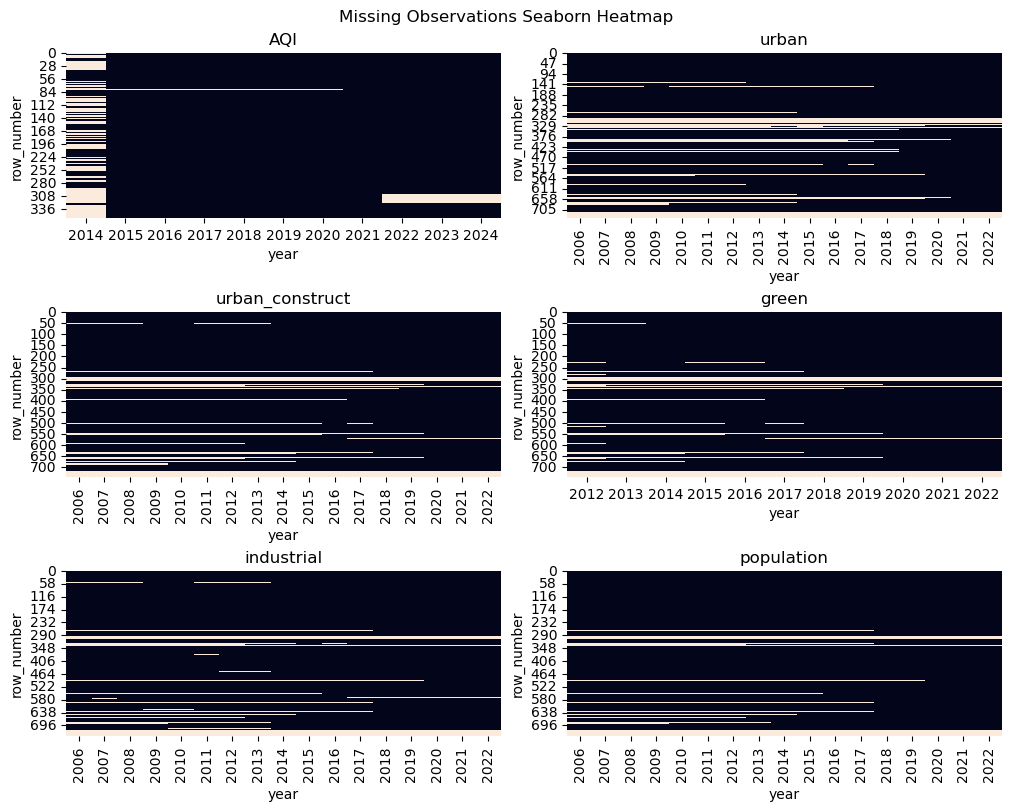

In [12]:
# 2.1.  

# Using sns.heatmap(), make a 3×2 plot of missing observations for the following datasets: 
# AQI, urban, urban_construct, green, industrial, population, and check the years with missing values. 
# Then decide and explain how to deal with missing values.


fig, axes = plt.subplots(3,2,figsize=(10, 8), constrained_layout=True)   

miss_dfs=[aqi.iloc[:, 2:],urban.iloc[:, 3:],urban_construct.iloc[:, 3:],green.iloc[:, 3:],industrial.iloc[:, 3:],population.iloc[:, 3:]]
titles=["AQI", "urban", "urban_construct", "green", "industrial", "population"]
for i in range(6):
    ax1=axes[i//2,i%2]                                     
    # i//2,i%2 stands for the order of the plots,(0,0) (0,1) (1,0) (1,1)
    # thus, ax1 is the i_th plot 
    # cbar=False: means that there won't be a color bar on the right side 
    sns.heatmap(data=miss_dfs[i].isnull(),cbar=False,ax=ax1)
    ax1.set_xlabel('year')                                 
    ax1.set_ylabel('row_number')   
    ax1.set_title(titles[i])

  
plt.suptitle('Missing Observations Seaborn Heatmap', fontsize=12)
plt.show()


The heatmap shows that the 2014 data in the AQI dataset has a large number of missing values, so the entire 2014 column cannot be included in the data analysis. The 2022-2024 columns also have many rows with missing values, but other datasets do not actually include data for 2023 and 2024. We can wait until all datasets are merged before deleting the rows with missing values.

My final decision was:

1. Focus on the 2017-2021 data across all datasets, as they are more relevant and have fewer missing values ​​overall.

2. Convert all datasets to clean long format.

3. After merging all datasets into a single dataset, delete all rows with missing values.

In [13]:
# Focus on the 2017-2021 data across all datasets.

# I just noticed that the column names in aqi are not all objects, so:
aqi.columns = list(aqi.columns[:2]) + list(aqi.columns[2:].astype(str))

aqi=aqi.filter(["city_cn", "city_en","2017","2018","2019","2020","2021"])
aqi.head(10)

,city_cn,city_en,2017,2018,2019,2020,2021
0,安庆市,Anqing City,82.446575,80.060274,82.942466,68.564384,66.301370
1,蚌埠市,Bengbu City,96.002740,91.210959,87.290411,79.786301,78.920548
2,亳州市,Bozhou City,106.613699,98.230137,98.846575,90.317808,83.934247
3,池州市,Chizhou City,87.950685,76.641096,81.372603,65.846575,67.117808
4,滁州市,Chuzhou City,91.890411,89.049315,85.871233,76.465753,74.939726
5,阜阳市,Fuyang City,100.638356,90.361644,97.950685,87.909589,82.983562
6,合肥市,Hefei City,93.178082,84.002740,85.391781,71.616438,70.512329
7,淮北市,Huaibei City,107.627397,99.372603,100.698630,89.473973,83.104110
8,淮南市,Huainan City,101.698630,92.219178,95.123288,85.736986,83.432877
9,黄山市,Huangshan City,54.213699,43.958904,55.635616,53.342466,48.210959


In [14]:
urban=urban.filter(["city_cn", "city_en","city_code","2017","2018","2019","2020","2021"])
urban_construct=urban_construct.filter(["city_cn", "city_en","city_code","2017","2018","2019","2020","2021"])
green=green.filter(["city_cn", "city_en","city_code","2017","2018","2019","2020","2021"])
industrial=industrial.filter(["city_cn", "city_en","city_code","2017","2018","2019","2020","2021"])
population=population.filter(["city_cn", "city_en","city_code","2017","2018","2019","2020","2021"])

In [15]:
# 2.2.  
# Convert all datasets to clean long format.

# aqi
aqi_long=pd.melt(aqi,id_vars=["city_cn","city_en"],var_name="year",value_name="aqi_score")
aqi_long.head(10)

,city_cn,city_en,year,aqi_score
0,安庆市,Anqing City,2017,82.446575
1,蚌埠市,Bengbu City,2017,96.002740
2,亳州市,Bozhou City,2017,106.613699
3,池州市,Chizhou City,2017,87.950685
4,滁州市,Chuzhou City,2017,91.890411
5,阜阳市,Fuyang City,2017,100.638356
6,合肥市,Hefei City,2017,93.178082
7,淮北市,Huaibei City,2017,107.627397
8,淮南市,Huainan City,2017,101.698630
9,黄山市,Huangshan City,2017,54.213699


In [16]:
# urban
urban_long=pd.melt(urban,id_vars=["city_cn","city_en","city_code"],var_name="year",value_name="urban_land")
urban_long.head(10)

,city_cn,city_en,city_code,year,urban_land
0,台湾省,Taiwan Province,710000,2017,NaN
1,安庆市,Anqing City,340800,2017,821.20
2,蚌埠市,Bengbu City,340300,2017,956.93
3,亳州市,Bozhou City,341600,2017,2226.00
4,池州市,Chizhou City,341700,2017,2431.70
5,滁州市,Chuzhou City,341100,2017,1404.31
6,阜阳市,Fuyang City,341200,2017,1923.75
7,合肥市,Hefei City,340100,2017,1312.48
8,淮北市,Huaibei City,340600,2017,754.00
9,淮南市,Huainan City,340400,2017,1689.96


In [17]:
# urban_construct
urban_construct_long=pd.melt(urban_construct,id_vars=["city_cn","city_en","city_code"],var_name="year",value_name="constructed_land")
urban_construct_long.head(10)

,city_cn,city_en,city_code,year,constructed_land
0,台湾省,Taiwan Province,710000,2017,NaN
1,安庆市,Anqing City,340800,2017,101.91
2,蚌埠市,Bengbu City,340300,2017,143.36
3,亳州市,Bozhou City,341600,2017,69.00
4,池州市,Chizhou City,341700,2017,38.55
5,滁州市,Chuzhou City,341100,2017,86.94
6,阜阳市,Fuyang City,341200,2017,127.07
7,合肥市,Hefei City,340100,2017,446.00
8,淮北市,Huaibei City,340600,2017,93.91
9,淮南市,Huainan City,340400,2017,104.16


In [18]:
# green
green_long=pd.melt(green,id_vars=["city_cn","city_en","city_code"],var_name="year",value_name="green_land")
green_long.head(10)

,city_cn,city_en,city_code,year,green_land
0,台湾省,Taiwan Province,710000,2017,NaN
1,安庆市,Anqing City,340800,2017,6.56
2,蚌埠市,Bengbu City,340300,2017,9.37
3,亳州市,Bozhou City,341600,2017,4.91
4,池州市,Chizhou City,341700,2017,3.37
5,滁州市,Chuzhou City,341100,2017,6.14
6,阜阳市,Fuyang City,341200,2017,6.01
7,合肥市,Hefei City,340100,2017,77.96
8,淮北市,Huaibei City,340600,2017,9.47
9,淮南市,Huainan City,340400,2017,3.23


In [19]:
# industrial
industrial_long=pd.melt(industrial,id_vars=["city_cn","city_en","city_code"],var_name="year",value_name="industrial_land")
industrial_long.head(10)

,city_cn,city_en,city_code,year,industrial_land
0,台湾省,Taiwan Province,710000,2017,NaN
1,安庆市,Anqing City,340800,2017,9.48
2,蚌埠市,Bengbu City,340300,2017,25.30
3,亳州市,Bozhou City,341600,2017,13.95
4,池州市,Chizhou City,341700,2017,5.32
5,滁州市,Chuzhou City,341100,2017,23.15
6,阜阳市,Fuyang City,341200,2017,21.72
7,合肥市,Hefei City,340100,2017,79.55
8,淮北市,Huaibei City,340600,2017,19.10
9,淮南市,Huainan City,340400,2017,18.65


In [20]:
# population
population_long=pd.melt(population,id_vars=["city_cn","city_en","city_code"],var_name="year",value_name="population")
population_long.head(10)

,city_cn,city_en,city_code,year,population
0,台湾省,Taiwan Province,710000,2017,NaN
1,安庆市,Anqing City,340800,2017,74.12
2,蚌埠市,Bengbu City,340300,2017,115.13
3,亳州市,Bozhou City,341600,2017,167.00
4,池州市,Chizhou City,341700,2017,67.14
5,滁州市,Chuzhou City,341100,2017,55.77
6,阜阳市,Fuyang City,341200,2017,228.97
7,合肥市,Hefei City,340100,2017,270.11
8,淮北市,Huaibei City,340600,2017,105.06
9,淮南市,Huainan City,340400,2017,180.70


In [21]:
# 2.3.  
# Merge all datasets into a single dataset using inner merge.


df_all1=pd.merge(urban_long,urban_construct_long,on = ["city_cn", "city_en","city_code","year"],how = 'inner')
df_all2=pd.merge(df_all1,green_long,on = ["city_cn", "city_en","city_code","year"],how = 'inner')
df_all3=pd.merge(df_all2,industrial_long,on = ["city_cn", "city_en","city_code","year"],how = 'inner')
df_all4=pd.merge(df_all3,population_long,on = ["city_cn", "city_en","city_code","year"],how = 'inner')
df_all5=pd.merge(df_all4,aqi_long,on = ["city_cn", "city_en","year"],how = 'inner')
print("number of missing values within each column:",df_all5.isna().sum())


number of missing values within each column: city_cn               0
city_en               0
city_code             0
year                  0
urban_land          200
constructed_land    207
green_land          207
industrial_land     206
population          198
aqi_score             4
dtype: int64


In [22]:
# 2.4.  
# Drop all rows with missing values. Now we have a panel dataset df_all.

df_all=df_all5.drop(columns={"city_cn"})
df_all=df_all.dropna()
print("In df_all, there are", len(df_all[['city_code','year']].drop_duplicates()),"unrepeated rows.")
print("number of missing values within each column:",df_all.isna().sum())

df_all.head(10)

In df_all, there are 1573 unrepeated rows.
number of missing values within each column: city_en             0
city_code           0
year                0
urban_land          0
constructed_land    0
green_land          0
industrial_land     0
population          0
aqi_score           0
dtype: int64


,city_en,city_code,year,urban_land,constructed_land,green_land,industrial_land,population,aqi_score
0,Anqing City,340800,2017,821.20,101.91,6.56,9.48,74.12,82.446575
1,Bengbu City,340300,2017,956.93,143.36,9.37,25.30,115.13,96.002740
2,Bozhou City,341600,2017,2226.00,69.00,4.91,13.95,167.00,106.613699
3,Chizhou City,341700,2017,2431.70,38.55,3.37,5.32,67.14,87.950685
4,Chuzhou City,341100,2017,1404.31,86.94,6.14,23.15,55.77,91.890411
5,Fuyang City,341200,2017,1923.75,127.07,6.01,21.72,228.97,100.638356
6,Hefei City,340100,2017,1312.48,446.00,77.96,79.55,270.11,93.178082
7,Huaibei City,340600,2017,754.00,93.91,9.47,19.10,105.06,107.627397
8,Huainan City,340400,2017,1689.96,104.16,3.23,18.65,180.70,101.698630
9,Huangshan City,341000,2017,2376.70,55.74,6.61,9.87,45.98,54.213699


In [23]:
# 2.5.  
# Turn it into a cross_sectional dataset df_all_mean using groupby.

df_all_mean=df_all.groupby('city_en').agg({
    "city_code":"first",
    "urban_land":"mean",
    "constructed_land":"mean",
    "green_land":"mean",
    "industrial_land":"mean",
    "population":"mean",
    "aqi_score":"mean"
})
print("In df_all_mean, there are", len(df_all_mean[['city_code']].drop_duplicates()),"unrepeated rows (observations of unrepeated cities)") 
df_all_mean


In df_all_mean, there are 313 unrepeated rows (observations of unrepeated cities)


,city_code,urban_land,constructed_land,green_land,industrial_land,population,aqi_score
city_en,,,,,,,
Ankang City,610900,3644.524,45.000,19.690,0.790,101.856,64.417534
Anqing City,340800,821.200,128.032,14.686,22.246,73.652,76.063014
Anshan City,210300,792.000,175.870,7.518,55.308,146.258,77.631233
Anshun City,520400,2703.000,69.444,5.670,11.344,116.338,48.752329
Anyang City,410500,586.714,87.510,15.278,8.756,126.862,119.239452
...,...,...,...,...,...,...,...
silver city,620400,3478.000,66.738,6.230,21.840,49.754,76.861370
suizhou city,421300,1425.410,74.840,4.886,19.656,112.484,76.435616
suqian city,321300,2108.000,100.992,9.406,29.388,177.434,88.666849


---

#### 3. Further data cleaning

Now we have a cross_sectional dataset df_all_mean with data of 300+ unrepeated cities and no missing values, but it's still not ready for regression. We still need to:

- 3.1.  Check whether there are impossible values in each variable, and drop those rows. Including the following conditions:
    - Theoretically, in each city, 0 < industrial_land < constructed_land < urban_land. 
    - Same, 0 < green_land < constructed_land < urban_land. 
    - population > 0. aqi_score >= 0.

- 3.2.  Check the outliers in each variable.
    - skim and see summary.
    - For outliers (extremely large values) in aqi_score, I will absolutely keep them because they indicate serious air pollution in these cities, and are valuable observations. 

- 3.3.  Add new columns: 
    - green_coverage = green_land / constructed_land
    - population_density = population / urban_land
    - industrial_ratio = industrial_land / constructed_land
    
These new columns are the actual variables for this project.

In [24]:
# 3.1.  
# Check whether there are impossible values in each variable, and drop those rows. Including the following conditions:
# - Theoretically, in each city, 0 < industrial_land < constructed_land < urban_land. 
# - Same, 0 < green_land < constructed_land < urban_land. 
# - population > 0. aqi_score >= 0.

df_all_mean=df_all_mean.loc[lambda x:x['industrial_land']>0]
df_all_mean=df_all_mean.loc[lambda x:x['industrial_land']<x['constructed_land']]
df_all_mean=df_all_mean.loc[lambda x:x['constructed_land']<x['urban_land']]

df_all_mean=df_all_mean.loc[lambda x:x['green_land']>0]
df_all_mean=df_all_mean.loc[lambda x:x['green_land']<x['constructed_land']]

df_all_mean=df_all_mean.loc[lambda x:x['population']>0]
df_all_mean=df_all_mean.loc[lambda x:x['aqi_score']>=0]
df_all_mean.head(10)

,city_code,urban_land,constructed_land,green_land,industrial_land,population,aqi_score
city_en,,,,,,,
Ankang City,610900,3644.524,45.000,19.690,0.790,101.856,64.417534
Anqing City,340800,821.200,128.032,14.686,22.246,73.652,76.063014
Anshan City,210300,792.000,175.870,7.518,55.308,146.258,77.631233
Anshun City,520400,2703.000,69.444,5.670,11.344,116.338,48.752329
Anyang City,410500,586.714,87.510,15.278,8.756,126.862,119.239452
Baicheng City,220800,2568.800,45.542,2.742,11.688,48.228,54.926027
Baise City,451000,4659.600,55.244,8.210,7.856,51.504,55.656438
Baishan City,220600,2736.000,41.730,4.734,6.378,52.544,61.301370
Baoding City,130600,2564.780,192.646,23.612,43.868,287.676,108.629041


In [25]:
# 3.2.  Check the outliers in each variable.
skim(df_all_mean)
# There are no reasons for me to exclude any outliers here, because I can't prove they are caused by measurement error, and they are all relevant. 

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 313    │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 7      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column             ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ city_code          │   0 │     0 │  384900 │  140300 │ 110000 │ 320600 │ 371400 │ 451300 │ 659000 │ ▃▃▇▇▃▃ │  │
│ │ urban_land         │   0 │     0 │    3281 │    5774 │  233.8 │   1365 │   2140 │   3533 │  85040 │   ▇    │  │
│ │ constructed_land   │   0 │     0 │   153.7 │   216.1 │  8.146 │  53.57 │  83.65 │  153.8 │   1757 │   ▇▁   │  │
│ │ green_land         │   0 │     0 │   16.85 │   20.25 │  0.696 │  6.118 │   10.7 │  17.54 │  127.8 │   ▇▁   │  │
│ │ industrial_land    │   0 │     0 │   31.31 │   53.26 │   0.16 │  7.174 │  15.18 │  30.17 │  470.7 │   ▇    │  │
│ │ population         │   0 │     0 │   180.8 │   281.1 │   4.37 │  67.16 │  107.6 │  181.8 │   2564 │   ▇    │  │
│ │ aqi_score          │   0 │     0 │   73.86 │   17.97 │  32.55 │  59.33 │  73.63 │  84.37 │  119.2 │ ▁▇▇▇▃▂ │  │
│ └────────────────────┴─────┴───────┴─────────┴─────────┴────────┴────────┴────────┴────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [26]:
# 3.3.  
# Add new columns: 
# - green_coverage = green_land / constructed_land
# - population_density = population / urban_land
# - industrial_ratio = industrial_land / constructed_land


df_all_mean['green_coverage']=df_all_mean['green_land']/df_all_mean['constructed_land']
df_all_mean['population_density']=df_all_mean['population']/df_all_mean['urban_land']
df_all_mean['industrial_ratio']=df_all_mean['industrial_land']/df_all_mean['constructed_land']
df_final=df_all_mean.filter(["city_en", "city_code","aqi_score","green_coverage","population_density","industrial_ratio"])
df_final.head(10)

,city_code,aqi_score,green_coverage,population_density,industrial_ratio
city_en,,,,,
Ankang City,610900,64.417534,0.437556,0.027948,0.017556
Anqing City,340800,76.063014,0.114706,0.089688,0.173753
Anshan City,210300,77.631233,0.042747,0.184669,0.314482
Anshun City,520400,48.752329,0.081649,0.043040,0.163355
Anyang City,410500,119.239452,0.174586,0.216225,0.100057
Baicheng City,220800,54.926027,0.060208,0.018775,0.256642
Baise City,451000,55.656438,0.148613,0.011053,0.142205
Baishan City,220600,61.301370,0.113444,0.019205,0.152840
Baoding City,130600,108.629041,0.122567,0.112164,0.227713


In [27]:
skim(df_final)
# There is no need to exclude any outliers in df_final.

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 313    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA ┃ NA % ┃ mean    ┃ sd      ┃ p0        ┃ p25     ┃ p50     ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ city_code       │  0 │    0 │  384900 │  140300 │    110000 │  320600 │  371400 │ 451300 │ 659000 │ ▃▃▇▇▃▃ │  │
│ │ aqi_score       │  0 │    0 │   73.86 │   17.97 │     32.55 │   59.33 │   73.63 │  84.37 │  119.2 │ ▁▇▇▇▃▂ │  │
│ │ green_coverage  │  0 │    0 │  0.1312 │ 0.06708 │   0.01604 │ 0.08704 │  0.1163 │ 0.1637 │ 0.4376 │  ▅▇▃▁  │  │
│ │ population_dens │  0 │    0 │ 0.08059 │ 0.08298 │ 0.0004269 │ 0.03081 │ 0.06336 │ 0.1007 │ 0.7036 │   ▇▁   │  │
│ │ ity             │    │      │         │         │           │         │         │        │        │        │  │
│ │ industrial_rati │  0 │    0 │  0.1762 │ 0.08347 │   0.01246 │  0.1108 │  0.1757 │ 0.2381 │ 0.5009 │  ▅▇▇▃  │  │
│ │ o               │    │      │         │         │           │         │         │        │        │        │  │
│ └─────────────────┴────┴──────┴─────────┴─────────┴───────────┴─────────┴─────────┴────────┴────────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

---
---

#### Part II: Regression Analysis

Here I only used OLS.

#### 1. Univariate regression analysis

- 1.1.  Simple linear regressions of **Y: AQI** on:
    - model0: **X: population density**
    - model1: **Z1: green coverage**
    - model2: **Z2: industrial land ratio**


- 1.2.  Apply log-transformation to regression of **Y: AQI** on **X: population density**:
    - model3: **AQI** on **ln(population density)**
    - model4: **ln(AQI)** on **population density**
    - model5: **ln(AQI)** on **ln(population density)**

- 1.3.  Compare all the models above with Stargazer, and decide which log-transformation is better.



In [28]:

# 1.1.  
# model0: 
# Simple linear regressions of Y: AQI on X: population density

model0 = smf.ols("aqi_score ~ population_density", data=df_final).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:              aqi_score   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     26.96
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           3.76e-07
Time:                        13:16:05   Log-Likelihood:                -1334.9
No. Observations:                 313   AIC:                             2674.
Df Residuals:                     311   BIC:                             2681.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             68.9256      1

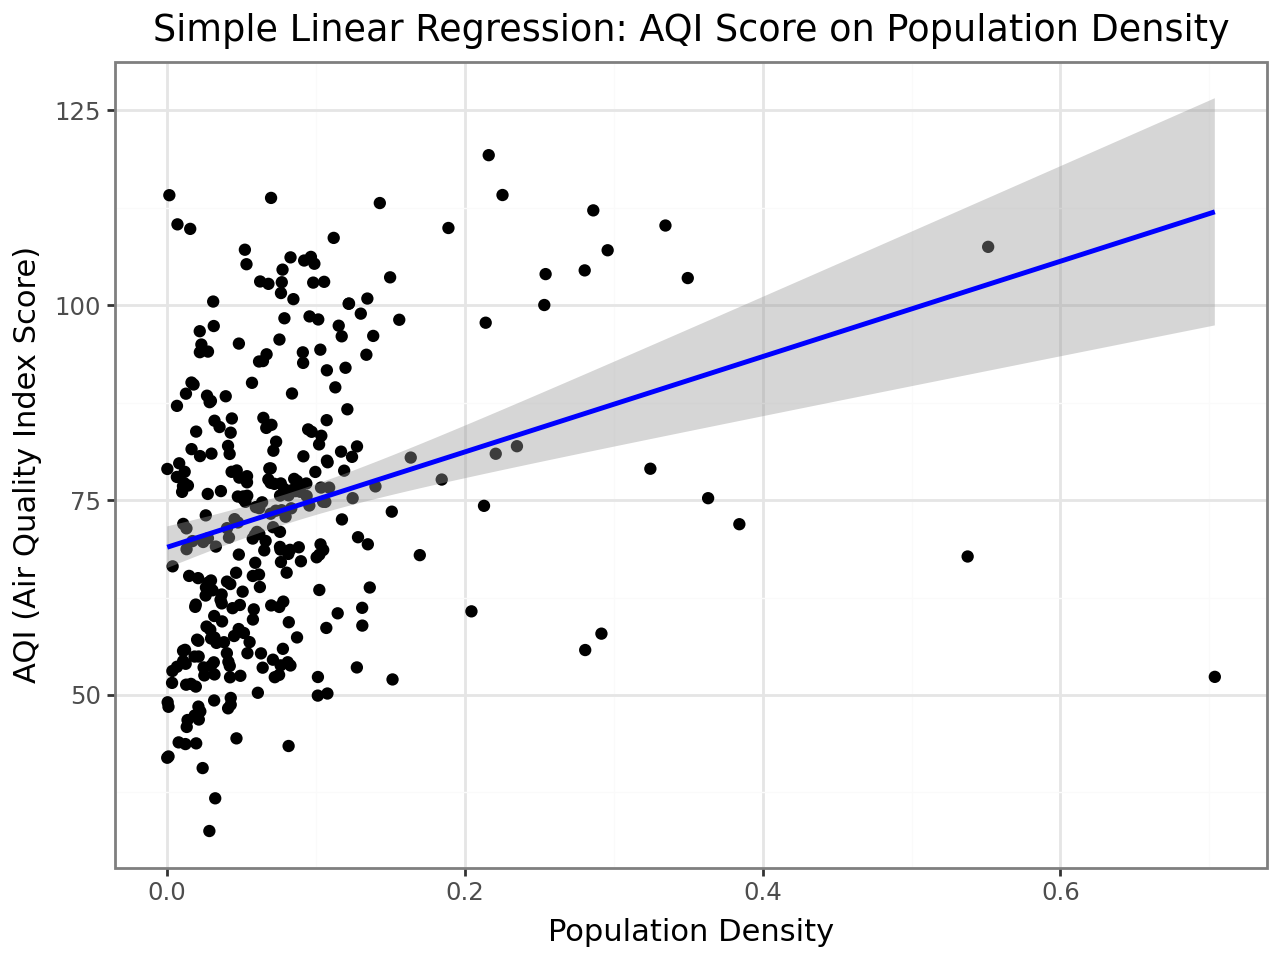

In [29]:
p0=(
    ggplot(df_final, aes(x="population_density", y="aqi_score"))
    + geom_point()
    + geom_smooth(method="ols", color = "blue")
    + labs(x="Population Density", y="AQI (Air Quality Index Score)")
    + ggtitle("Simple Linear Regression: AQI Score on Population Density")
    + theme_bw()
)
p0.save("../graphs/Simple-Linear-Regression_AQI-Score-on-Population-Density.png", dpi=300, width=8, height=6)
p0


In [30]:
# model1:
# Simple linear regressions of Y: AQI on Z1: green coverage

model1 = smf.ols("aqi_score ~ green_coverage", data=df_final).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:              aqi_score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.088
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.298
Time:                        13:16:09   Log-Likelihood:                -1347.3
No. Observations:                 313   AIC:                             2699.
Df Residuals:                     311   BIC:                             2706.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         71.7813      2.234     32.

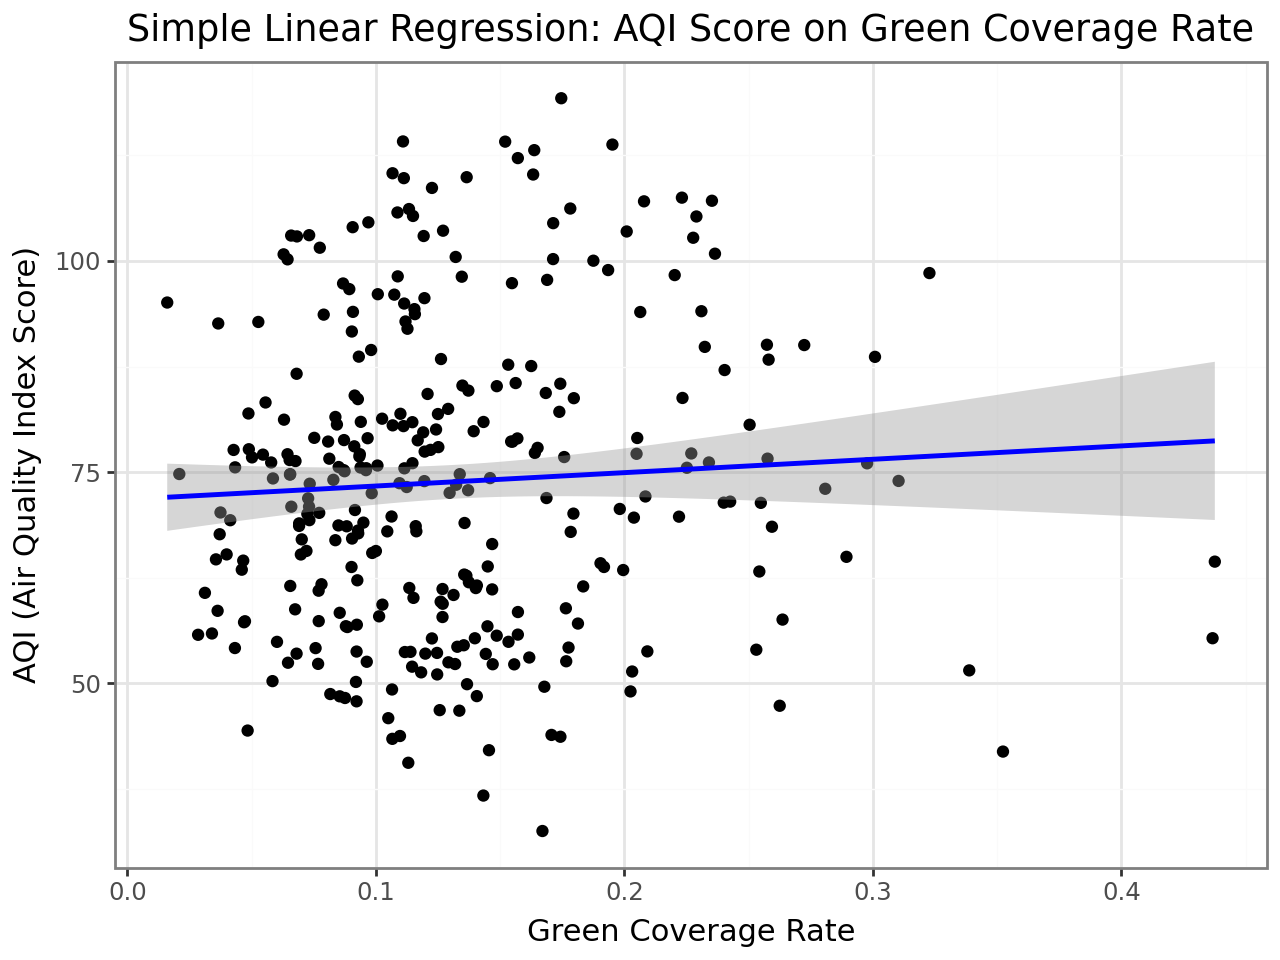

In [31]:
p1=(
    ggplot(df_final, aes(x="green_coverage", y="aqi_score"))
    + geom_point()
    + geom_smooth(method="ols", color = "blue")
    + labs(x="Green Coverage Rate", y="AQI (Air Quality Index Score)")
    + ggtitle("Simple Linear Regression: AQI Score on Green Coverage Rate")
    + theme_bw()
)
p1.save("../graphs/Simple-Linear-Regression_AQI-Score-on-Green-Coverage-Rate.png", dpi=300, width=8, height=6)
p1


In [32]:
# model2:
# Simple linear regressions of Y: AQI on Z2: industrial land ratio

model2 = smf.ols("aqi_score ~ industrial_ratio", data=df_final).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:              aqi_score   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.01569
Date:                Thu, 11 Dec 2025   Prob (F-statistic):              0.900
Time:                        13:16:12   Log-Likelihood:                -1347.9
No. Observations:                 313   AIC:                             2700.
Df Residuals:                     311   BIC:                             2707.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           73.5866      2.381  

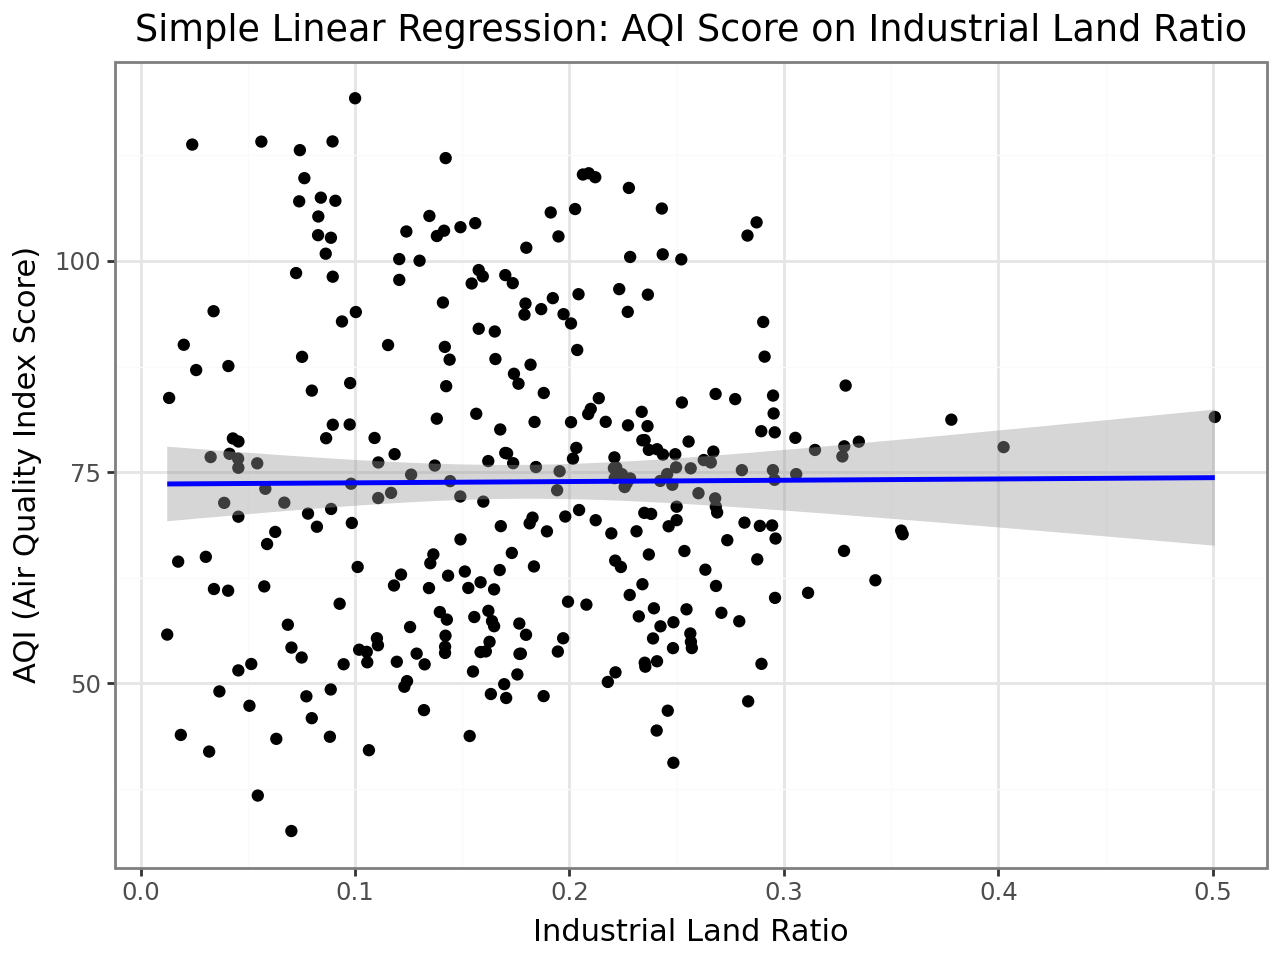

In [33]:
p2=(
    ggplot(df_final, aes(x="industrial_ratio", y="aqi_score"))
    + geom_point()
    + geom_smooth(method="ols", color = "blue")
    + labs(x="Industrial Land Ratio", y="AQI (Air Quality Index Score)")
    + ggtitle("Simple Linear Regression: AQI Score on Industrial Land Ratio")
    + theme_bw()
)
p2.save("../graphs/Simple-Linear-Regression_AQI-Score-on-Industrial-Land-Ratio.png", dpi=300, width=8, height=6)
p2


In [34]:
# 1.2.  
# Apply log-transformation to regression of Y: AQI** on X: population density:
# - model3: AQI on ln(population density)

df_final["ln_population_density"]=np.log(df_final["population_density"])
model3 = smf.ols("aqi_score ~ ln_population_density", data=df_final).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:              aqi_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     39.84
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           9.47e-10
Time:                        13:16:15   Log-Likelihood:                -1329.0
No. Observations:                 313   AIC:                             2662.
Df Residuals:                     311   BIC:                             2670.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                90.83

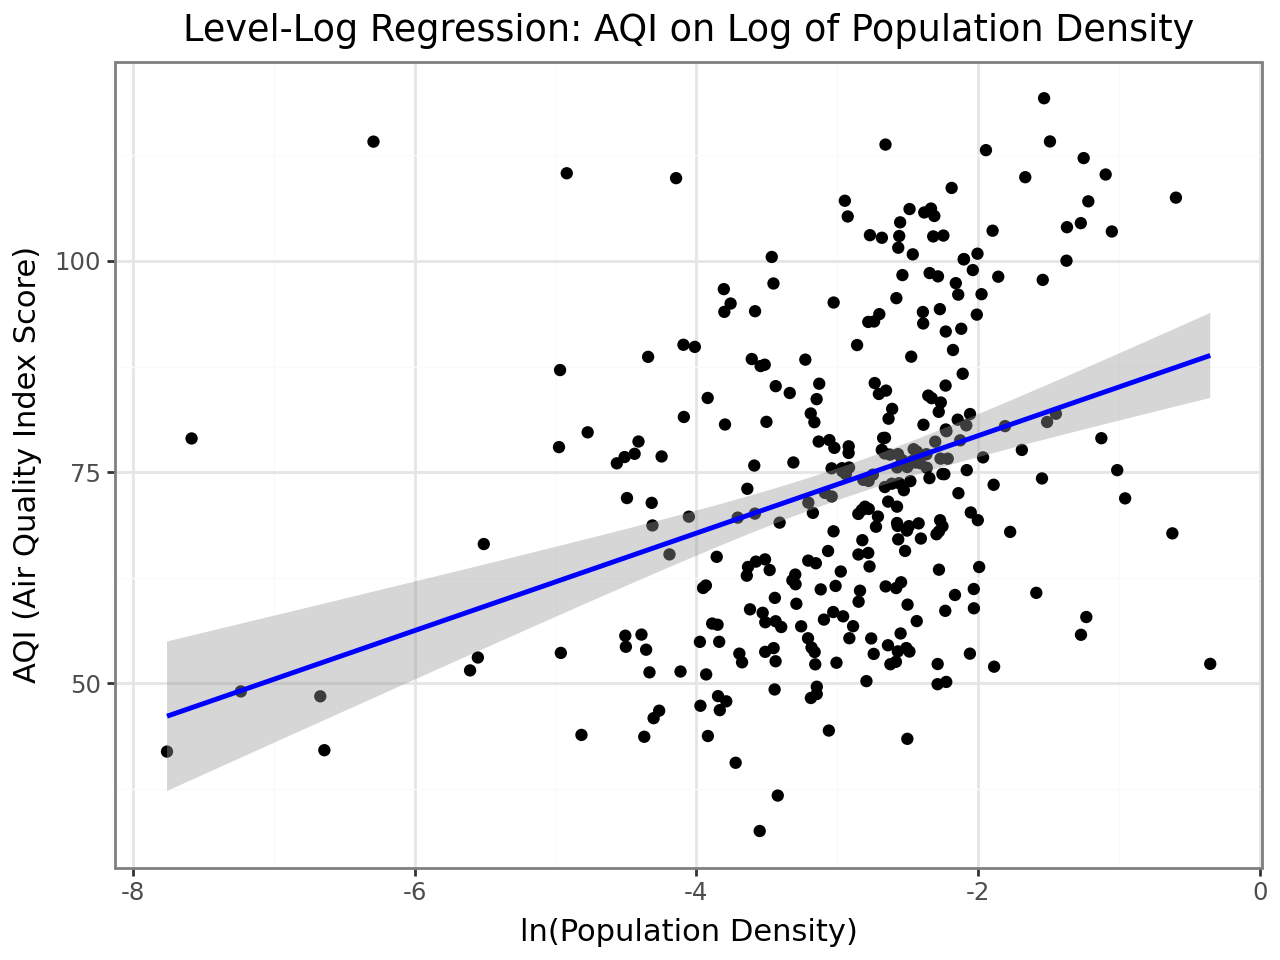

In [35]:
p3=(
    ggplot(df_final, aes(x="ln_population_density", y="aqi_score"))
    + geom_point()
    + geom_smooth(method="ols", color = "blue")
    + labs(x="ln(Population Density)", y="AQI (Air Quality Index Score)")
    + ggtitle("Level-Log Regression: AQI on Log of Population Density")
    + theme_bw()
)
p3.save("../graphs/Level-Log-Regression_AQI-on-Log-of-Population-Density.png", dpi=300, width=8, height=6)
p3


In [36]:
# model4: 
# ln(AQI) on population density

df_final["ln_aqi_score"]=np.log(df_final["aqi_score"])
model4 = smf.ols("ln_aqi_score ~ population_density", data=df_final).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_aqi_score   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     25.07
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           9.28e-07
Time:                        13:16:18   Log-Likelihood:                 5.1625
No. Observations:                 313   AIC:                            -6.325
Df Residuals:                     311   BIC:                             1.167
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.2063      0

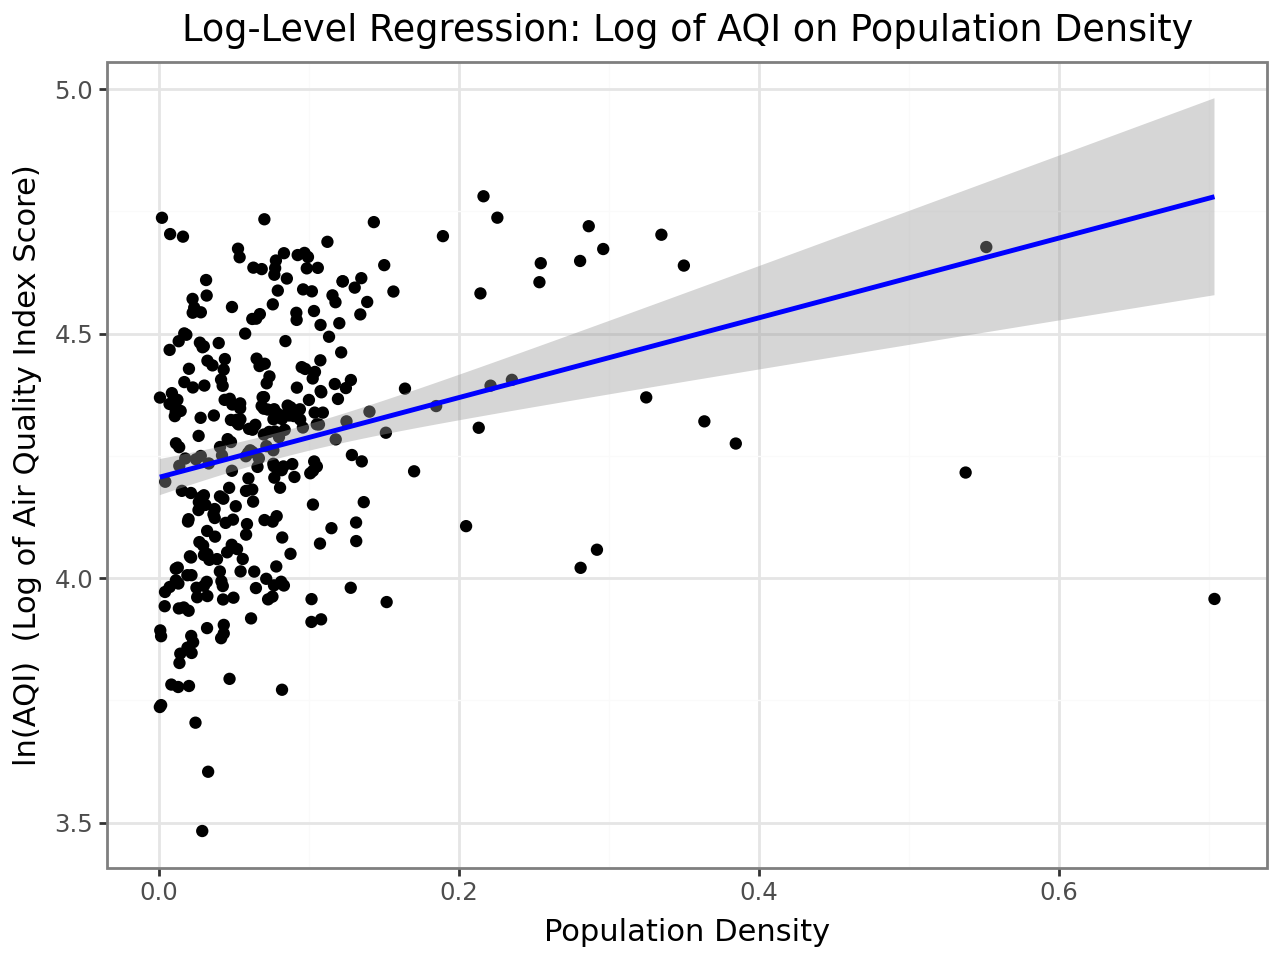

In [37]:
p4=(
    ggplot(df_final, aes(x="population_density", y="ln_aqi_score"))
    + geom_point()
    + geom_smooth(method="ols", color = "blue")
    + labs(x="Population Density", y="ln(AQI)  (Log of Air Quality Index Score)")
    + ggtitle("Log-Level Regression: Log of AQI on Population Density")
    + theme_bw()
)
p4.save("../graphs/Log-Level-Regression_Log-of-AQI-on-Population-Density.png", dpi=300, width=8, height=6)
p4


In [38]:
# model5: 
# ln(AQI) on ln(population density)

model5 = smf.ols("ln_aqi_score ~ ln_population_density", data=df_final).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_aqi_score   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     44.36
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.24e-10
Time:                        13:16:20   Log-Likelihood:                 13.898
No. Observations:                 313   AIC:                            -23.80
Df Residuals:                     311   BIC:                            -16.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.51

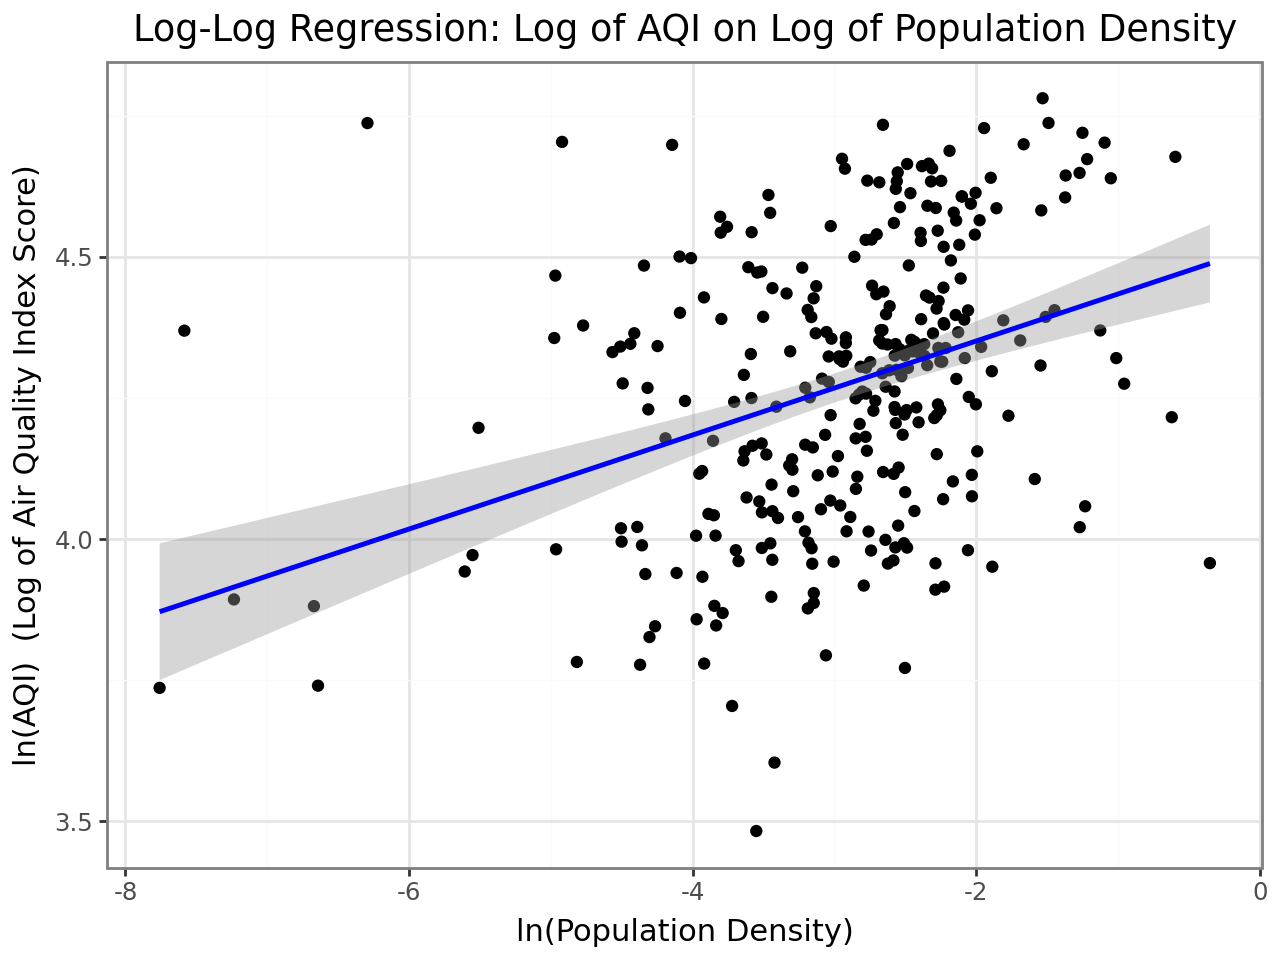

In [39]:
p5=(
    ggplot(df_final, aes(x="ln_population_density", y="ln_aqi_score"))
    + geom_point()
    + geom_smooth(method="ols", color = "blue")
    + labs(x="ln(Population Density)", y="ln(AQI)  (Log of Air Quality Index Score)")
    + ggtitle("Log-Log Regression: Log of AQI on Log of Population Density")
    + theme_bw()
)
p5.save("../graphs/Log-Log-Regression_Log-of-AQI-on-Log-of-Population-Density.png", dpi=300, width=8, height=6)
p5


In [40]:
# 1.3.  
# Compare all the models above with Stargazer, and decide which log-transformation is better.

regression_table1 = Stargazer([model0, model1, model2, model3, model4, model5])

regression_table1.custom_columns(
    [
        "AQI on Population Density",
        "AQI on Green Coverage Rate",
        "AQI on Industrial Land Ratio",
        "AQI on ln(Population Density)",
        "ln(AQI) on Population Density",
        "ln(AQI) on ln(Population Density)"
    ],
    [1, 1, 1, 1,1,1],
)

regression_table1.covariate_order([
    "Intercept",
    "population_density", 
    "ln_population_density", 
    "green_coverage",
    "industrial_ratio"
])

regression_table1.rename_covariates({
    "population_density": "Population Density",
    "ln_population_density": "ln(Population Density)",
    "green_coverage": "Green Coverage Rate",
    "industrial_ratio": "Industrial Land Ratio"
})

open('../tables/regression_table1.tex', 'w', encoding='utf-8').write(regression_table1.render_latex())
regression_table1

----

A brief summary of the models above:

First, the linear regression of **AQI on Population Density** indicates a clear positive relationship between air pollution levels and population density. The estimated parameter for population density is 61.181, with a p-value below 0.01, suggesting statistical significance. However, the R-squared value is only 0.08, indicating that population density alone explains a very small portion of the variation in AQI. This result is reasonable, as air pollution levels are influenced by multiple factors such as climate, geography, ecological conditions, and energy sources, which I didn't include in this project because of lack of data. Since the model considers only three variables, its explanatory power is naturally limited.

Secondly, the regressions of AQI on Green Coverage Rate and Industrial Land Ratio show that these variables are mostly uncorrelated with air pollution levels. The standard errors of their coefficients are large, the p-values are greater than 0.1, and the R-squared values are extremely low. This is also evident in the scatter plots, where the fitted linear trend lines are almost completely flat. These findings seem to suggest that, based solely on these data, large investments in urban green spaces may not have a measurable impact on air quality. However, it is also important to note that causal interpretations cannot be drawn definitively due to the absence of many potential confounding variables. Also, the overall industrial emissions in Chinese cities may be low due to strict regulatory controls, which could possibly explain why there isn't an observable impact of industrial land ratio on AQI. 

Finally, through applying log-transformations to AQI and Population Density, the R-squared values of models improved, with the highest R-squared in the log-log transformation model. However, we cannot directly conclude that the log-log transformation model is still the best with control variables.

---

#### 2. Multiple regression analysis

- 2.1.  Fit multiple regression models, using cov_type="HC3" to reduce the impact of heteroscedasticity.

    - ModelA: **AQI** ~ Industrial Land Ratio + Green Coverage Rate + **Population Density**

    - ModelB: **AQI** ~ Industrial Land Ratio + Green Coverage Rate + **ln(Population Density)**

    - ModelC: **ln(AQI)** ~ Industrial Land Ratio + Green Coverage Rate + **Population Density**

    - ModelD: **ln(AQI)** ~ Industrial Land Ratio + Green Coverage Rate + **ln(Population Density)**

- 2.2. Using a stargazer table to compare and decide the final model.

In [41]:
# 2.1.  
# Fit multiple regression models, using cov_type="HC3" to reduce the impact of heteroscedasticity.
# ModelA: AQI ~ Industrial Land Ratio + Green Coverage Rate + Population Density


modelA = smf.ols("aqi_score ~ population_density + green_coverage + industrial_ratio", data=df_final).fit(cov_type ="HC3")
print(modelA.summary())

                            OLS Regression Results                            
Dep. Variable:              aqi_score   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     2.946
Date:                Thu, 11 Dec 2025   Prob (F-statistic):             0.0331
Time:                        13:16:23   Log-Likelihood:                -1333.2
No. Observations:                 313   AIC:                             2674.
Df Residuals:                     309   BIC:                             2689.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             63.2707      5

In [42]:
# Fit multiple regression models, using cov_type="HC3" to reduce the impact of heteroscedasticity.
# ModelB: AQI ~ Industrial Land Ratio + Green Coverage Rate + ln(Population Density)

modelB = smf.ols("aqi_score ~ ln_population_density + green_coverage + industrial_ratio", data=df_final).fit(cov_type ="HC3")
print(modelB.summary())

                            OLS Regression Results                            
Dep. Variable:              aqi_score   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     9.572
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           4.62e-06
Time:                        13:16:24   Log-Likelihood:                -1325.0
No. Observations:                 313   AIC:                             2658.
Df Residuals:                     309   BIC:                             2673.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                88.47

In [43]:
# Fit multiple regression models, using cov_type="HC3" to reduce the impact of heteroscedasticity.
# ModelC: ln(AQI) ~ Industrial Land Ratio + Green Coverage Rate + Population Density

modelC = smf.ols("ln_aqi_score ~ population_density + green_coverage + industrial_ratio", data=df_final).fit(cov_type ="HC3")
print(modelC.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_aqi_score   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.758
Date:                Thu, 11 Dec 2025   Prob (F-statistic):             0.0425
Time:                        13:16:24   Log-Likelihood:                 6.9479
No. Observations:                 313   AIC:                            -5.896
Df Residuals:                     309   BIC:                             9.089
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.1002      0

In [44]:
# Fit multiple regression models, using cov_type="HC3" to reduce the impact of heteroscedasticity.
# ModelD: ln(AQI) ~ Industrial Land Ratio + Green Coverage Rate + ln(Population Density)

modelD = smf.ols("ln_aqi_score ~ ln_population_density + green_coverage + industrial_ratio", data=df_final).fit(cov_type ="HC3")
print(modelD.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_aqi_score   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     10.19
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.04e-06
Time:                        13:16:24   Log-Likelihood:                 17.252
No. Observations:                 313   AIC:                            -26.50
Df Residuals:                     309   BIC:                            -11.52
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.44

In [45]:
# 2.2. 
# Using a stargazer table to compare and decide the final model.

regression_table2 = Stargazer([modelA, modelB, modelC, modelD])

regression_table2.custom_columns(
    [
        "AQI on Population Density, Green Coverage Rate, and Industrial Land Ratio",
        "AQI on Log of Population Density, Green Coverage Rate, and Industrial Land Ratio",
        "Log of AQI on Population Density, Green Coverage Rate, and Industrial Land Ratio",
        "Log of AQI on Log of Population Density, Green Coverage Rate, and Industrial Land Ratio)"
    ],
    [1, 1, 1, 1],
)
regression_table2.covariate_order([
    "Intercept",
    "population_density", 
    "ln_population_density", 
    "green_coverage",
    "industrial_ratio"
])
regression_table2.rename_covariates({
    "population_density": "Population Density",
    "ln_population_density": "ln(Population Density)",
    "green_coverage": "Green Coverage Rate",
    "industrial_ratio": "Industrial Land Ratio"
})
open('../tables/regression_table2.tex', 'w', encoding='utf-8').write(regression_table2.render_latex())

regression_table2

---

A brief summary of the fitting results for the multivariate models above: 

When comparing only the R-squared values, Model D (Log of AQI regressed on Log of Population Density, Green Coverage Rate, and Industrial Land Ratio) demonstrates the best fit. 

An unexpected finding in this model is that, the fitted parameter for the Green Coverage Rate variable is 0.57, which is positive and statistically significant with a p-value less than 0.05. This suggests that green coverage and air pollution seem to vary in the same direction. Does this imply that increased green space will lead to higher levels of air pollution? I would say, not necessarily. I believe this result may be caused by the original data where the green coverage rate itself is very low, often around 0.0 or even 0.00, so multiplying it by 0.57 has minimal influence on the AQI index. I would still conclude that there is likely no meaningful correlation between the green coverage rate and air pollution levels.

---

#### 3. Regression analysis: control variables

For the following regression analysis, I will choose Model D (Log of AQI regressed on Log of Population Density, Green Coverage Rate, and Industrial Land Ratio) as the base model.

- 3.1.  Create two categorical binary variables: green_high & industrial_high, which equal 1 when Green Coverage Rate and Industrial Land Ratio are above the mean value.
    
    fit a new model:

    - Model D1: **ln(AQI)** ~ **ln(Population Density)** + **$green_{high}$** + **$industrial_{high}$**

- 3.2.  Compare it with:

    - Model D: **ln(AQI)** ~ **ln(Population Density)**, Green Coverage Rate, and Industrial Land Ratio

    - Model 5: **ln(AQI)** ~ **ln(Population Density)**

    to see the effect of Population Density with and without control variables.

In [46]:
# 3.1.  
# Create two categorical binary variables: green_high & industrial_high, 
# which equal 1 when Green Coverage Rate and Industrial Land Ratio are above the mean value.
    

df_final['green_high']=(df_final['green_coverage']>df_final['green_coverage'].mean()).astype(int)
df_final['industrial_high']=(df_final['industrial_ratio']>df_final['industrial_ratio'].mean()).astype(int)
df_final.head(10)

,city_code,aqi_score,green_coverage,population_density,industrial_ratio,ln_population_density,ln_aqi_score,green_high,industrial_high
city_en,,,,,,,,,
Ankang City,610900,64.417534,0.437556,0.027948,0.017556,-3.577421,4.165386,1,0
Anqing City,340800,76.063014,0.114706,0.089688,0.173753,-2.411415,4.331562,0,0
Anshan City,210300,77.631233,0.042747,0.184669,0.314482,-1.689189,4.351970,0,1
Anshun City,520400,48.752329,0.081649,0.043040,0.163355,-3.145618,3.886753,0,0
Anyang City,410500,119.239452,0.174586,0.216225,0.100057,-1.531438,4.781134,1,0
Baicheng City,220800,54.926027,0.060208,0.018775,0.256642,-3.975254,4.005987,0,1
Baise City,451000,55.656438,0.148613,0.011053,0.142205,-4.505025,4.019198,1,0
Baishan City,220600,61.301370,0.113444,0.019205,0.152840,-3.952601,4.115802,0,0
Baoding City,130600,108.629041,0.122567,0.112164,0.227713,-2.187793,4.687939,0,1


In [47]:
# fit a new model:
# Model D1: ln(AQI) ~ ln(Population Density) + green_{high} + industrial_{high}

modelD1 = smf.ols("ln_aqi_score ~ ln_population_density + green_high + industrial_high", data=df_final).fit(cov_type ="HC3")
print(modelD1.summary())

                            OLS Regression Results                            
Dep. Variable:           ln_aqi_score   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     10.40
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.55e-06
Time:                        13:16:25   Log-Likelihood:                 15.083
No. Observations:                 313   AIC:                            -22.17
Df Residuals:                     309   BIC:                            -7.182
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.50

In [48]:
# 3.2.  
# Compare it with:
# - Model D: ln(AQI) ~ ln(Population Density), Green Coverage Rate, and Industrial Land Ratio
# - Model 5: ln(AQI) ~ ln(Population Density)
# to see the effect of Population Density with and without control variables.

regression_table3 = Stargazer([modelD, model5,modelD1])

regression_table3.custom_columns(
    [
        "ln(AQI) on ln(Population Density), Green Coverage Rate, and Industrial Land Ratio",
        "ln(AQI) on only ln(Population Density)",
        "ln(AQI) on ln(Population Density), if Green Coverage Rate is high, and if Industrial Land Ratio is high"
    ],
    [1, 1,1],
)
regression_table3.covariate_order([
    "Intercept",
    "ln_population_density", 
    "green_coverage",
    "industrial_ratio",
    "green_high",
    "industrial_high",
])
regression_table3.rename_covariates({
    "ln_population_density": "ln(Population Density)",
    "green_coverage": "Green Coverage Rate",
    "industrial_ratio": "Industrial Land Ratio",
    "green_high":"1 when Green Coverage Rate is High",
    "industrial_high":"1 when Industrial Land Ratio is High"
})
open('../tables/regression_table3.tex', 'w', encoding='utf-8').write(regression_table3.render_latex())

regression_table3

---

A brief summary of the fitting results for the above multivariate models: 

When including control variables, the explanatory power of Model D (Log of AQI regressed on Log of Population Density, Green Coverage Rate, and Industrial Land Ratio) is only marginally improved compared to the model without control variables (Model 5), with an increase in R-squared of 0.018, which is practically insignificant. This finding aligns with previous results indicating that Green Coverage Rate and Industrial Land Ratio have almost no linear correlation with AQI. 

Additionally, I introduced a new model by categorizing Green Coverage Rate and Industrial Land Ratio into high and low groups to explore differences in AQI among areas with high or low green coverage and industrial land ratio. The results show that the coefficients for these grouping variables are very small (0.044 and 0.008), and their standard errors are relatively large, suggesting that the grouping does not significantly influence air pollution levels.

---

#### 4. Prediction

- 4.1. draw a y^-y plot of:
    - Model D (Log of AQI on Log of Population Density, Green Coverage Rate, and Industrial Land Ratio)
    - Model 5 (Log of AQI on only Log of Population Density)

- 4.2. draw a Residual plot of:
    - Model D (Log of AQI on Log of Population Density, Green Coverage Rate, and Industrial Land Ratio)
    - Model 5 (Log of AQI on only Log of Population Density)

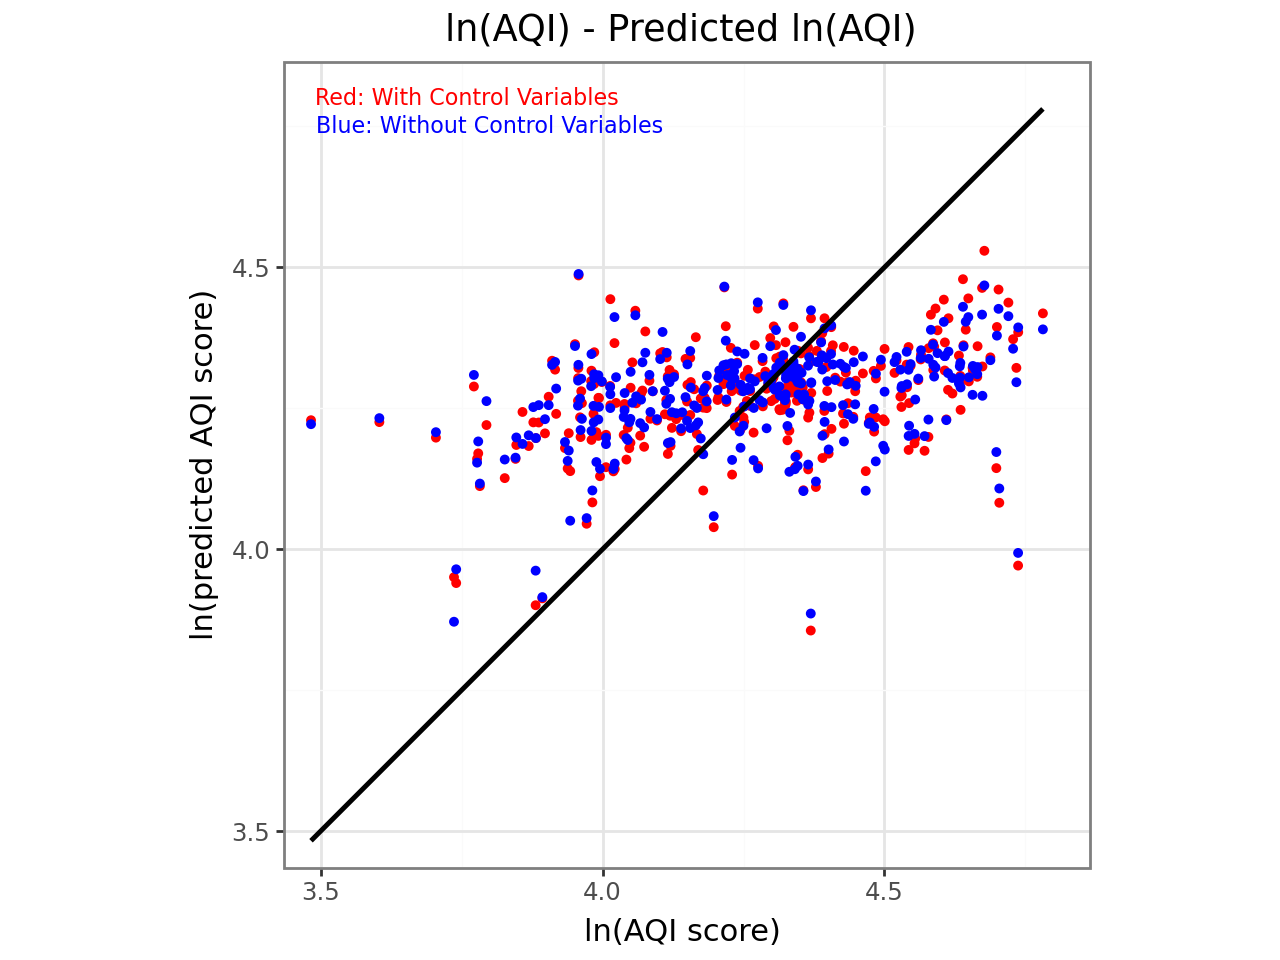

In [49]:
# 4.1. 
# draw a y^-y plot of:
# Model D (Log of AQI on Log of Population Density, Green Coverage Rate, and Industrial Land Ratio)
# Model 5 (Log of AQI on only Log of Population Density)

df_final["ln_aqi_hat_D"] = modelD.fittedvalues
df_final["ln_aqi_hat_5"] = model5.fittedvalues
df_final["ln_aqi_resid_D"] = modelD.resid
df_final["ln_aqi_resid_5"] = model5.resid

y_hat_y=(
    ggplot(df_final)
    + geom_point(aes(x="ln_aqi_score", y="ln_aqi_hat_D"), color="red", size=1)
    + geom_point(aes(x="ln_aqi_score", y="ln_aqi_hat_5"), color="blue", size=1)
    + geom_line(aes(x="ln_aqi_score", y="ln_aqi_score"),color="black", size=1)
    + labs(x="ln(AQI score) ", y="ln(predicted AQI score)")
    + coord_cartesian(xlim=(3.5, 4.8), ylim=(3.5, 4.8))
    + annotate("text", x=3.76, y=4.8, label="Red: With Control Variables", size=8, color="red")
    + annotate("text", x=3.8, y=4.75, label="Blue: Without Control Variables", size=8, color="blue")
    + ggtitle("ln(AQI) - Predicted ln(AQI) ")
    + theme_bw()
    + theme(aspect_ratio=1,legend_position='left')
)
y_hat_y.save("../graphs/log-of-AQI_Predicted-log-of-AQI.png", dpi=300, width=8, height=6)
y_hat_y


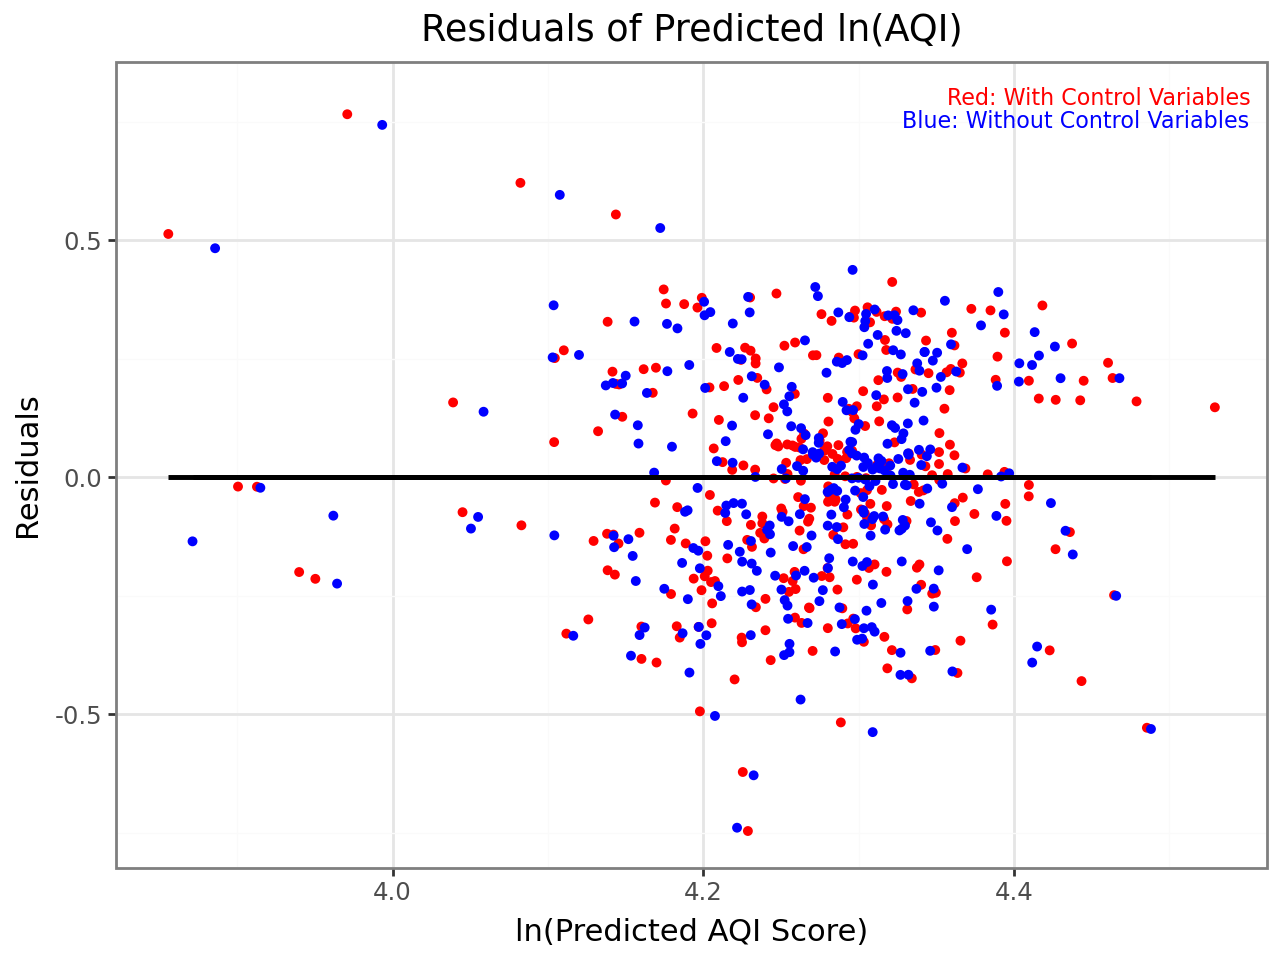

In [50]:
# 4.2. 
# draw a Residual plot of:
# Model D (Log of AQI on Log of Population Density, Green Coverage Rate, and Industrial Land Ratio)
# Model 5 (Log of AQI on only Log of Population Density)

p_residual=(
    ggplot(df_final)
    + geom_point(aes(x="ln_aqi_hat_D", y="ln_aqi_resid_D"), color="red", size=1)
    + geom_point(aes(x="ln_aqi_hat_5", y="ln_aqi_resid_5"), color="blue", size=1)
    + geom_smooth(aes(x="ln_aqi_hat_D", y="ln_aqi_resid_D"),method="lm", colour="black", se=False, formula="y~x")
    + geom_smooth(aes(x="ln_aqi_hat_5", y="ln_aqi_resid_5"),method="lm", colour="black", se=False, formula="y~x")
    + labs(x="ln(Predicted AQI Score)", y="Residuals")
    + annotate("text", x=4.455, y=0.8, label="Red: With Control Variables", size=8, color="red")
    + annotate("text", x=4.44, y=0.75, label="Blue: Without Control Variables", size=8, color="blue")
    + ggtitle("Residuals of Predicted ln(AQI)")
    + theme_bw()
)
p_residual.save("../graphs/Residuals_of_Predicted-log-of-AQI.png", dpi=300, width=8, height=6)
p_residual

In both plots, it's impossible to determine whether the model's prediction performance is better with control variables simply by observation, because the scatter points deviate from the straight line to roughly the same degree. This conclusion aligns with the previous finding: with control variables, the model's R-squared only increases by 0.018, resulting in almost identical fitting performance.